> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Once you complete this project, remove these **Tip** sections from your report before submission. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

## Project: Investigate a Dataset - TMDb movie                                                              data

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 


> For my project i choose to work on tmdb movies data .
This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue .

Columns list:<br/> 
> id             :Identifiant du film  <br/>
> imdb_id        :Identifiant imdb du film <br/>
> popularity     :Popularité du film<br/>
>budget         :Le budget<br/>
>revenue        :Le revenu<br/>
>original_title :Le titre <br/>
>cast           :Acteurs<br/>
>homepage       :Site du page d'accueil du film<br/>
> director   :Directeur du film <br/>
>tagline        :Slogan du film<br/>
>keywords       :Mot clé qui définit le film<br/>
>overview       :petit résumé du film<br/>
>runtime        :La durée du film en minutes<br/>
>genres         :Les genres du film<br/>
>production_companies : Sociétés de production de films<br/>
>release_date         : Date de sortie du film<br/>
>vote_count           : nombre de votes <br/>
>vote_average         : La moyenne du film par votes<br/> 
>release_year         : année de sortie<br/>
>budget_adj           : le budget du film associé en dollars de 2010<br/>
>revenue_adj          : le revenu du film associé en dollars de 2010<br/>



### Question(s) for Analysis

>**My questions** <br/> 
<ul>
<li>Which genres are
most popular from
year to year? </li>
<li> What
kinds of properties
are associated with
    movies that have high </li>
revenues? 
<li> Are popular movies well rated on voting ? </li>
<li> Did the popular movies invests a lot of money in ? </li>
<li> Does the running time of the movie affect its revenue ? </li>
<li> What are the movies with the best gains ? </li>
<li> What is the best production company ? </li>
<li> Who is the best director ? </li>
</ul>



In [1]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline
# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html


In [4]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==0.25.0

    100% |████████████████████████████████| 10.5MB 3.8MB/s eta 0:00:01
    100% |████████████████████████████████| 13.4MB 2.6MB/s eta 0:00:01   20% |██████▌                         | 2.7MB 26.1MB/s eta 0:00:01    67% |█████████████████████▌          | 9.0MB 22.2MB/s eta 0:00:01    74% |███████████████████████▉        | 10.0MB 21.9MB/s eta 0:00:01    98% |███████████████████████████████▌| 13.2MB 26.3MB/s eta 0:00:01
tensorflow 1.3.0 requires tensorflow-tensorboard<0.2.0,>=0.1.0, which is not installed.
  Found existing installation: numpy 1.12.1
    Uninstalling numpy-1.12.1:
      Successfully uninstalled numpy-1.12.1
  Found existing installation: pandas 0.23.3
    Uninstalling pandas-0.23.3:
      Successfully uninstalled pandas-0.23.3


<a id='wrangling'></a>
## Data Wrangling

> 


### General Properties


In [3]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df=pd.read_csv("Database_TMDb_movie_data/tmdb-movies.csv")
df.head(5)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [4]:
#Les dimensions de notre data
df.shape

(10866, 21)

In [5]:
#Une description des valeures quantitatives de notre data
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [6]:
#informations sur les valeurs non nulles des attributs et leurs types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [7]:
#Le nombre des valeurs nulles pour chaque colonne
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [8]:
#nombre des valeures dupliquées
df.duplicated().sum()

1


### Data Cleaning


In [9]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.
df.drop(["homepage","revenue_adj","budget_adj","tagline","keywords"],axis=1,inplace=True)

<p>J'ai supprimé les colonnes dont je n'ai pas besoin  </p>

In [10]:
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
director                  44
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
dtype: int64

In [11]:
df.imdb_id=df.imdb_id.fillna(df["id"])

<p>Remplir les valeurs nulles d l'id du imdb par l'id </p>

In [12]:
len(df[df.imdb_id==df.id])

10

In [13]:
df.overview=df.overview.fillna(df["original_title"])

Remplir les valeures null de l'overview par le titre du film 

In [14]:
df.isnull().sum()

id                         0
imdb_id                    0
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
director                  44
overview                   0
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
dtype: int64

In [15]:
df=df.fillna("unknown")

Remplir les champs du directeur , société de production , genre , casting par inconnu

In [16]:
df.isnull().sum()

id                      0
imdb_id                 0
popularity              0
budget                  0
revenue                 0
original_title          0
cast                    0
director                0
overview                0
runtime                 0
genres                  0
production_companies    0
release_date            0
vote_count              0
vote_average            0
release_year            0
dtype: int64

In [17]:
df=df.drop_duplicates()

Supprimer les valeures dupliquées

In [18]:
df.duplicated().sum()

0

<a id='eda'></a>
## Exploratory Data Analysis



#### Research Question 1 Which genres are most popular from year to year? 

On groupe les données par les années et on voit le plus populaire pour chacune

In [19]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.
data=df.groupby(["release_year"])["genres","popularity"].max().sort_values(by="release_year" , ascending=False)
data[:]

,genres,popularity
release_year,,
2015,unknown,32.985763
2014,unknown,24.949134
2013,unknown,6.112766
2012,unknown,7.637767
2011,War|Drama,8.411577
2010,unknown,9.363643
2009,unknown,9.432768
2008,unknown,8.466668
2007,Western,4.965391


Western War Drama Thriller are the most popular genres

#### Research Question 2   What kinds of properties are associated with movies that have high revenues?

   >Tout au long cette question on va utiliser un diagramme scatter afin de voir la corrélation entre le revenu et les autres champs .
   >C'est le meilleur choix pour cette tâche .

In [20]:
#Fonction qui dessine le diagramme scatter entre les deux variables 
def scatter_plot(X,Y):
    df.plot(x=X,y=Y,kind="scatter")
    plt.title("corrélation entre "+X+" et "+Y)
    plt.xlabel=X
    plt.ylabel=Y

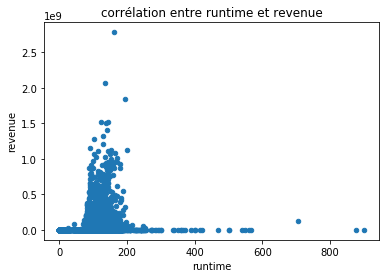

In [21]:

scatter_plot("runtime","revenue")

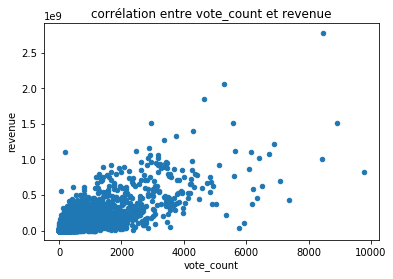

In [22]:
scatter_plot("vote_count","revenue")

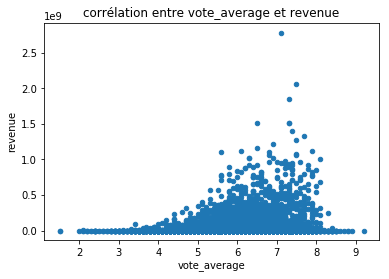

In [23]:
scatter_plot("vote_average","revenue")

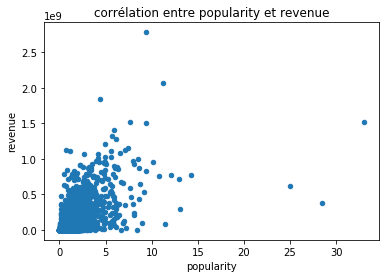

In [24]:
scatter_plot("popularity","revenue")

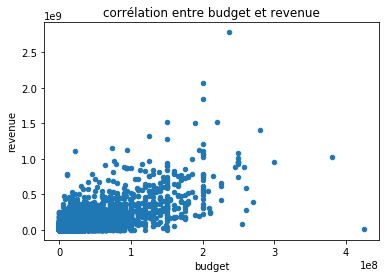

In [25]:
scatter_plot("budget","revenue")

Les films ayant un revenue grand dure de 75 min à 175 min , ont un grand nombre de votes et une grande moyenne et  une popularité varie presque entre 0 et 10 et un budget respectueux .

#### Research Question 3   Are popular movies well rated on voting ?

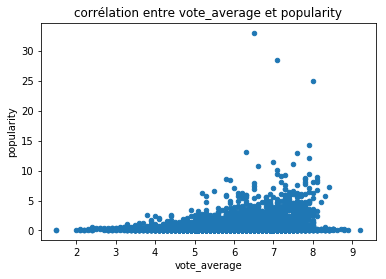

In [26]:
scatter_plot("vote_average","popularity")

Les films populaires sont souvent bien notés . La corrélation entre la popularité et la note du film est positive 

#### Research Question 4 Did the popular movies invests a lot of money in ? 

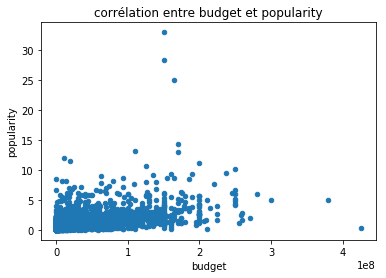

In [27]:
scatter_plot("budget","popularity")

Investir un grand budget ne veut pas dire que le film va être populaire , alors le grand budget n'affecte pas sur la popularité positivement par contre au revenue

#### Research Question 5 Does the running time of the movie affect its revenue ? 

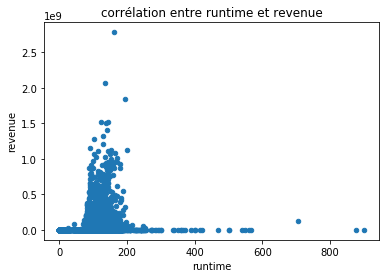

In [28]:
scatter_plot("runtime","revenue")

Si le film dure entre 100 et 150 min , il y a plus de chance de faire un grand revenue    

#### Research Question 6 : What are the movies with the best gains ? 

Créer une nouvelle variable égale au gain net du film et qui se calcule en soustrayant le budget du revenue

In [29]:
profit = df["revenue"]-df['budget']
df["profit"]=profit

df[["original_title","profit","release_year","genres","popularity","vote_average"]].sort_values(by="profit",ascending=False)

,original_title,profit,release_year,genres,popularity,vote_average
1386,Avatar,2544505847,2009,Action|Adventure|Fantasy|Science Fiction,9.432768,7.1
3,Star Wars: The Force Awakens,1868178225,2015,Action|Adventure|Science Fiction|Fantasy,11.173104,7.5
5231,Titanic,1645034188,1997,Drama|Romance|Thriller,4.355219,7.3
0,Jurassic World,1363528810,2015,Action|Adventure|Science Fiction|Thriller,32.985763,6.5
4,Furious 7,1316249360,2015,Action|Crime|Thriller,9.335014,7.3
4361,The Avengers,1299557910,2012,Science Fiction|Action|Adventure,7.637767,7.3
3374,Harry Potter and the Deathly Hallows: Part 2,1202817822,2011,Adventure|Family|Fantasy,5.711315,7.7
14,Avengers: Age of Ultron,1125035767,2015,Action|Adventure|Science Fiction,5.944927,7.4
5422,Frozen,1124219009,2013,Animation|Adventure|Family,6.112766,7.5
8094,The Net,1084279658,1995,Crime|Drama|Mystery|Thriller|Action,1.136610,5.6


Les films ayant un grand profit intégrent toujours plus de 3 genres , bien notées . Ils ne sont pas tous populaires . La plupart d'eux est réalisé aprés les années 2000

#### Research Question 7 : What is the best production company ? 

Grouper les données pas entreprises de production et compter le nombre de travaux , la somme des gains et la moyenne des votes

In [33]:
df.groupby("production_companies").agg({"production_companies":"count","profit":"sum","vote_average":"mean"}).sort_values(by="profit",ascending=False)

,production_companies,profit,vote_average
production_companies,,,
Paramount Pictures,156,5978839360,6.177564
Walt Disney Pictures|Pixar Animation Studios,17,5791558520,7.064706
Marvel Studios,22,4676908966,6.677273
DreamWorks Animation,31,4629741096,6.332258
Blue Sky Studios|Twentieth Century Fox Animation,7,3305820202,6.328571
Columbia Pictures,72,3245859137,6.095833
Universal Pictures|Illumination Entertainment,8,2851800871,6.700000
Ingenious Film Partners|Twentieth Century Fox Film Corporation|Dune Entertainment|Lightstorm Entertainment,1,2544505847,7.100000
Universal Pictures,133,2474778224,5.967669


Faire beaucoup de films ne veut pas dire que les entreprises de production gagnent les plus apart La première place de Paramount Pictures . Leurs films font de bonnes notes de moyennes . 

#### Research Question 8 : What is the best production director ?

Grouper les données pas directeur et compter le nombre de travaux , la somme des gains et la moyenne des votes

In [32]:
df.groupby("director").agg({"director":"count","profit":"sum","vote_average":"mean"}).sort_values(by="profit",ascending=False)

,director,profit,vote_average
director,,,
Steven Spielberg,29,7428613772,6.824138
Peter Jackson,13,5196468949,7.000000
James Cameron,10,5081849077,6.830000
Michael Bay,11,3557208171,6.327273
David Yates,5,3379295625,7.140000
Chris Columbus,14,3224491668,6.400000
Christopher Nolan,10,3162548502,7.470000
George Lucas,6,2955996893,6.700000
Robert Zemeckis,17,2843990869,6.705882


Les bons directeurs  font beaucoup  de films bien notés 

<a id='conclusions'></a>
## Conclusions


> Finallement , on peut conclure que le revenue du film est relié à sa moyenne de votes , plus le film traite plusieurs genres plus il succède .
Un bon film égale un bon directeur et une bonne boite de production qui doit investir un bon budget .

> Comme limitation j'ai aimé faire intégrer les acteurs dans mon analyse de données parce qu'il peut qu'ils influencent sur le revenu et la popularité . Malheureusement la forme comment les acteurs sont mentionnés dans la dataset n'aide pas à utiliser cette colonne dans l'analyse .


## Submitting your Project 


In [34]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_movies_Dataset'])

0